<a href="https://colab.research.google.com/github/darthVarada/leaningML/blob/main/workflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Pytorch WorkFlow

lets explore a an example PyTorch end-to-end workflow

Resouces:
* Ground truth notebook -https://github.com/mrdbourke/pytorch-deep-learning/tree/main
* Book version of notebook - https://www.learnpytorch.io/01_pytorch_workflow/


In [1]:
what_is_covering = {1: "data (prepering and loading)",
                    2: "building model",
                    3: "fitting the model to data (treining)",
                    4: "making predictions and evalueting a model (inference)",
                    5: "saving and loading a model",
                    6: "putting it all together"
}
what_is_covering

{1: 'data (prepering and loading)',
 2: 'building model',
 3: 'fitting the model to data (treining)',
 4: 'making predictions and evalueting a model (inference)',
 5: 'saving and loading a model',
 6: 'putting it all together'}

In [2]:
import torch
from torch import nn  # nn contains all of pytorch`s building blocks for neural networks
import matplotlib.pyplot as plt

# check pytorch version
torch.__version__

'2.0.1+cu118'

# data (prepering and loading)

data can be anything... in machine learning.

* exel spreadseet
* Images of any kind
* Videos (Youtube has a lot of data...)
* Audio like songs or podcasts
* DNA
* Text

Maching Learning is a game of two parts:
1. Get data into a numerical representations.
2. Build a model to learn patters in that numerical representation.

to show case this, let`s create some *know* data using the linear regresion formula.

we`ll use a linear regression formula to make a straight line with *know* **parameters**.

In [3]:
# create *know* parameters

weight = 0.7
bias = 0.3

start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [4]:
len(X), len(y)

(50, 50)

## Spliting data into treining and test sets (one of the most import concepts in ML in general)
let`s create a training and test set with our data.

In [5]:
train_split = int(0.8 * len(X))
train_split
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

In [6]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10, 7))

  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")

  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

  if predictions is not None:
    # Plot the predictions in red (predictions were made on the test data)
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  # Show the legend
  plt.legend(prop={"size": 14});

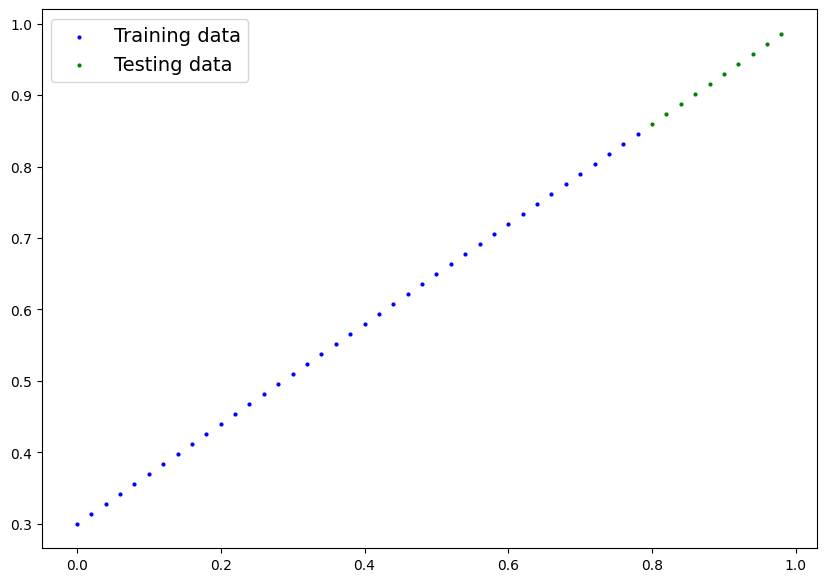

In [7]:
plot_predictions();

## 2. building model

out first pyTorch model!

a bit o classes in this link:
https://realpython.com/python3-object-oriented-programming/

What this model does:
* start with random values (weight and bias)
* look at training data and adjust the random values to better represent (as possible) the ideal values (the weight & bias values we used to create the data)

How does it do so?

Through two main algorithms:
1. Gradient descent: https://www.youtube.com/watch?v=IHZwWFHWa-w&ab_channel=3Blue1Brown
2. backpropagation: https://www.youtube.com/watch?v=Ilg3gGewQ5U&t=3s&ab_channel=3Blue1Brown

In [8]:
# create linear regression model class
from torch import nn
class LinearRegressionModel(nn.Module): # <- almost everything in pytorch from nn.Model
  def __init__(self):
    super().__init__()
    self.weight = nn.Parameter(torch.randn(1,
                                           requires_grad = True,
                                           dtype=torch.float))

    self.bias = nn.Parameter(torch.randn(1,
                                         requires_grad = True,
                                         dtype=torch.float))
  # foward mothod to define the computation in the model
  def forward(self, x: torch.Tensor) -> torch.Tensor: # <- "x" is a input data
    return self.weight * x + self.bias #formula from linear regresion

torch.manual_seed(42)
model_0 = LinearRegressionModel()

### pyTorch model building essesentials

* torch.nn - contains all the buildings for computations graphs (a neural network can be consider a computational graph)
* torch.nn.Parameter - what parameter should our model try and learn, often a pytorh layer from torch.nn will set these for us
* torch.nn.Module - the base class for all neural network modules, if you subclass it, you should overwrite forward()
* torch.optim - this where the optimizers in PyTorch live, they will help with gradient descent
* def forward() - all nn.Module subclasses require you to overwrite forward(), this method defines what happens in the forward computation
see more on: https://pytorch.org/tutorials/beginner/ptcheat.html?highlight=cheat


### cheking the contents of our PyTorch model

Now we`ve created a model, let's see what's inside...

so we can check our model parameters or what's inside our model using `.parameters()`  

In [9]:
# Create a random seed
torch.manual_seed(42)

# Create a intence of the model (this is a subclass of nn.Module)
model_0 = LinearRegressionModel()
# check out the parameters
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [10]:
model_0.state_dict()

OrderedDict([('weight', tensor([0.3367])), ('bias', tensor([0.1288]))])

### Making predicitions using `torch.inference_mode()`

to check our model's predictive power, let's see how well it predicts `y_test` based on `X_test`

When we pass data through our model, it's going to run it through the `forward()` method

In [11]:
X_test, y_test

(tensor([[0.8000],
         [0.8200],
         [0.8400],
         [0.8600],
         [0.8800],
         [0.9000],
         [0.9200],
         [0.9400],
         [0.9600],
         [0.9800]]),
 tensor([[0.8600],
         [0.8740],
         [0.8880],
         [0.9020],
         [0.9160],
         [0.9300],
         [0.9440],
         [0.9580],
         [0.9720],
         [0.9860]]))

In [12]:
## make predictions with model

with torch.inference_mode():
  y_preds = model_0(X_test)

y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

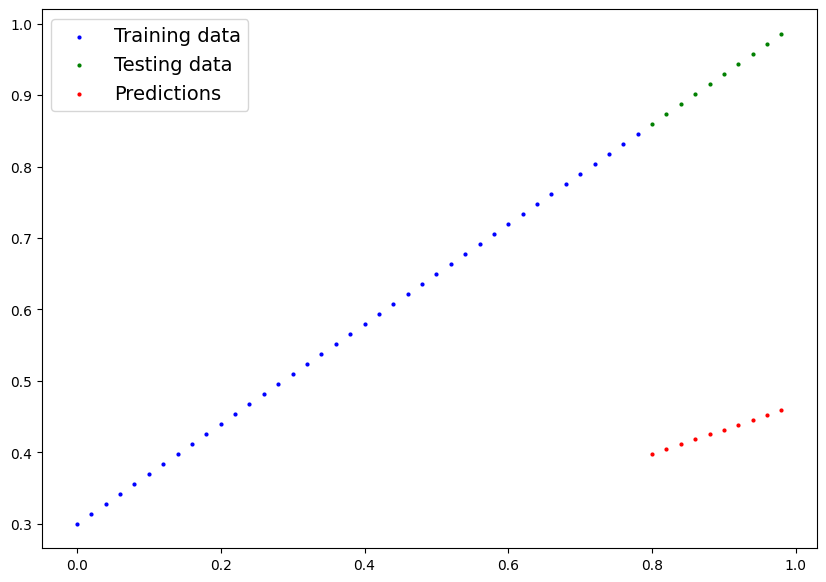

In [13]:
plot_predictions(predictions=y_preds)

## 3. train model

the hole idea of training is for a model to move from some *unknown* parameters (these may be random) to some *knwon* parameters.

or in other words from a poor representation of the data to a better representantion of the data.

One way to measure how wrong or how poor your models predictions are, is to use a loss functions

Note: loss function may also be called as cost function or criterion in different areas. For our case, loss function.

Things we need to train:

* **Loss function:** A function fo measure how wrong your model's predictions are to the ideal outputs, lower is better.
* **Optimizer:** Takes into account the accountthe loss of a model and ajust the models parameters (e. g. weight and biases)

And specifically for PyTorch, we need:

* A treining loop
* A testing loop

In [14]:
model_0.parameters()

<generator object Module.parameters at 0x7db915a39690>

In [15]:
model_0.state_dict()

OrderedDict([('weight', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [16]:
# setup a loss function
loss_fn = nn.L1Loss()

# setup a optimizer (stochastic gradient descent)
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.01) # lr = leaning rate = possibly the most important hyperparameter you can set

In [17]:
loss_fn

L1Loss()

**Q:** Which loss function and optimizer should i use:

**A:** this will be problem specific. But with experience, you'll get an idea of what works and what doesn't with particular problem set.

for exemple, for a regression probrem (like ours), a loss function of nn.L1Loss() and an optimizer like torch.optim.SGD() will suffice.
But for a classification problem like whether a photo is a dog or a cat, you'll likely wantto use a loss function of nn.BCELoss() (binary cross entropy loss)

### Building a training loop (and a testing loop) in PyTorch

a couple of things we need in a training loop:
0. loop throughthe data
1. forward pass (this involves data moving thrugh our model's `forward()` fuinctions) to make predictions on data - also called forward propagation
2. Calculate the loss (compare forward pass predictions to ground truth labels)
3. Optimizer zero grad
4. Loss backward - move backwards through the network to calculate the gradient of each of the parameters of our model with respect to the loss (**backpropagation**)
5. Optimizer step - use the optmizer to adjust our model's parameters to try and improve the loss (**gradient decent**)

In [18]:
with torch.no_grad():
  list(model_0.parameters())

In [19]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [20]:
torch.manual_seed(42)

# An epoch is one loop through the data... (this is a hyperparameter becouse we've set it ourselves)
epochs = 200

# Track different values
epoch_count = []
loss_values = []
test_loss_values = []
### treining
# 0. Loop through the data
for epoch in range(epochs):
  # Set the model to training mode
  model_0.train() #train mode in PyTorch sets all parameters that require gradients to require gradients

  #1. forward pass
  y_pred = model_0(X_train)

  #2. calculate the loss
  loss = loss_fn(y_pred, y_train)
  #print(f"loss: {loss}")
  #3. Optimizer zero grad
  optimizer.zero_grad()

  #4. perform backpropagation on the loss with respect to the parameters of the model
  loss.backward()

  #5. step the optimizer (perform gradient descent)
  optimizer.step() # by default how the optimizer chages will accumulate through the loop so... we have to zero them above in step 3 for the next iteration of the loop

  model_0.eval() # turns off different settings in the model not needed for evaluation/testing
  with torch.inference_mode(): # turns off gradient tracking & a couple more things behind the scenes`
  # with torch.no_grad(): # you may also see torch.no_grad() in older PyTorch code

    # 1. Do the forwordpass
    test_pred = model_0(X_test)

    # 2. Calculate The loss
    test_loss = loss_fn(test_pred, y_test)
  # print out the hole process
  if epoch % 10 == 0:
    epoch_count.append(epoch)
    loss_values.append(loss)
    test_loss_values.append(test_loss)
    print(f"Epoch: {epoch} | Loss: {loss} | test loss: {test_loss}")
  #print out model state_dict()
    print(model_0.state_dict())

Epoch: 0 | Loss: 0.31288138031959534 | test loss: 0.48106518387794495
OrderedDict([('weight', tensor([0.3406])), ('bias', tensor([0.1388]))])
Epoch: 10 | Loss: 0.1976713240146637 | test loss: 0.3463551998138428
OrderedDict([('weight', tensor([0.3796])), ('bias', tensor([0.2388]))])
Epoch: 20 | Loss: 0.08908725529909134 | test loss: 0.21729660034179688
OrderedDict([('weight', tensor([0.4184])), ('bias', tensor([0.3333]))])
Epoch: 30 | Loss: 0.053148526698350906 | test loss: 0.14464017748832703
OrderedDict([('weight', tensor([0.4512])), ('bias', tensor([0.3768]))])
Epoch: 40 | Loss: 0.04543796554207802 | test loss: 0.11360953003168106
OrderedDict([('weight', tensor([0.4748])), ('bias', tensor([0.3868]))])
Epoch: 50 | Loss: 0.04167863354086876 | test loss: 0.09919948130846024
OrderedDict([('weight', tensor([0.4938])), ('bias', tensor([0.3843]))])
Epoch: 60 | Loss: 0.03818932920694351 | test loss: 0.08886633068323135
OrderedDict([('weight', tensor([0.5116])), ('bias', tensor([0.3788]))])
E

In [21]:
import numpy as np

np.array(torch.tensor(loss_values).numpy()), test_loss_values

(array([0.31288138, 0.19767132, 0.08908726, 0.05314853, 0.04543797,
        0.04167863, 0.03818933, 0.0347609 , 0.03132383, 0.0278874 ,
        0.02445896, 0.02102021, 0.01758547, 0.01415539, 0.01071659,
        0.00728353, 0.00385178, 0.00893248, 0.00893248, 0.00893248],
       dtype=float32),
 [tensor(0.4811),
  tensor(0.3464),
  tensor(0.2173),
  tensor(0.1446),
  tensor(0.1136),
  tensor(0.0992),
  tensor(0.0889),
  tensor(0.0806),
  tensor(0.0723),
  tensor(0.0647),
  tensor(0.0565),
  tensor(0.0482),
  tensor(0.0406),
  tensor(0.0323),
  tensor(0.0241),
  tensor(0.0165),
  tensor(0.0082),
  tensor(0.0050),
  tensor(0.0050),
  tensor(0.0050)])

In [22]:
epoch_count, loss_values, test_loss_values

([0,
  10,
  20,
  30,
  40,
  50,
  60,
  70,
  80,
  90,
  100,
  110,
  120,
  130,
  140,
  150,
  160,
  170,
  180,
  190],
 [tensor(0.3129, grad_fn=<MeanBackward0>),
  tensor(0.1977, grad_fn=<MeanBackward0>),
  tensor(0.0891, grad_fn=<MeanBackward0>),
  tensor(0.0531, grad_fn=<MeanBackward0>),
  tensor(0.0454, grad_fn=<MeanBackward0>),
  tensor(0.0417, grad_fn=<MeanBackward0>),
  tensor(0.0382, grad_fn=<MeanBackward0>),
  tensor(0.0348, grad_fn=<MeanBackward0>),
  tensor(0.0313, grad_fn=<MeanBackward0>),
  tensor(0.0279, grad_fn=<MeanBackward0>),
  tensor(0.0245, grad_fn=<MeanBackward0>),
  tensor(0.0210, grad_fn=<MeanBackward0>),
  tensor(0.0176, grad_fn=<MeanBackward0>),
  tensor(0.0142, grad_fn=<MeanBackward0>),
  tensor(0.0107, grad_fn=<MeanBackward0>),
  tensor(0.0073, grad_fn=<MeanBackward0>),
  tensor(0.0039, grad_fn=<MeanBackward0>),
  tensor(0.0089, grad_fn=<MeanBackward0>),
  tensor(0.0089, grad_fn=<MeanBackward0>),
  tensor(0.0089, grad_fn=<MeanBackward0>)],
 [tensor(

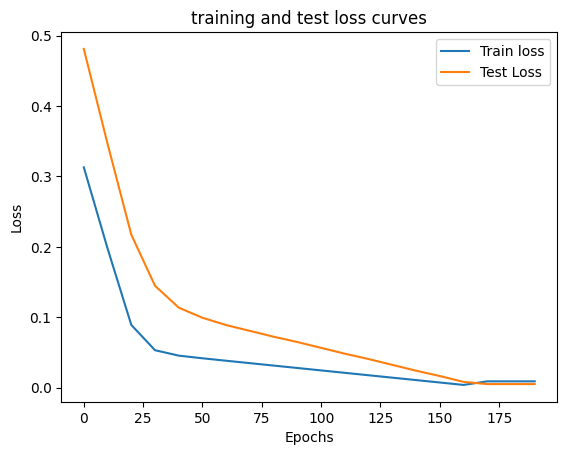

In [23]:
# plot the loss curves
plt.plot(epoch_count, np.array(torch.tensor(loss_values).cpu().numpy()), label="Train loss")
plt.plot(epoch_count, test_loss_values, label="Test Loss")
plt.title("training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend();

In [24]:
with torch.inference_mode():
  y_preds_new = model_0(X_test)

In [25]:
model_0.state_dict()

OrderedDict([('weight', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [26]:
weight, bias

(0.7, 0.3)

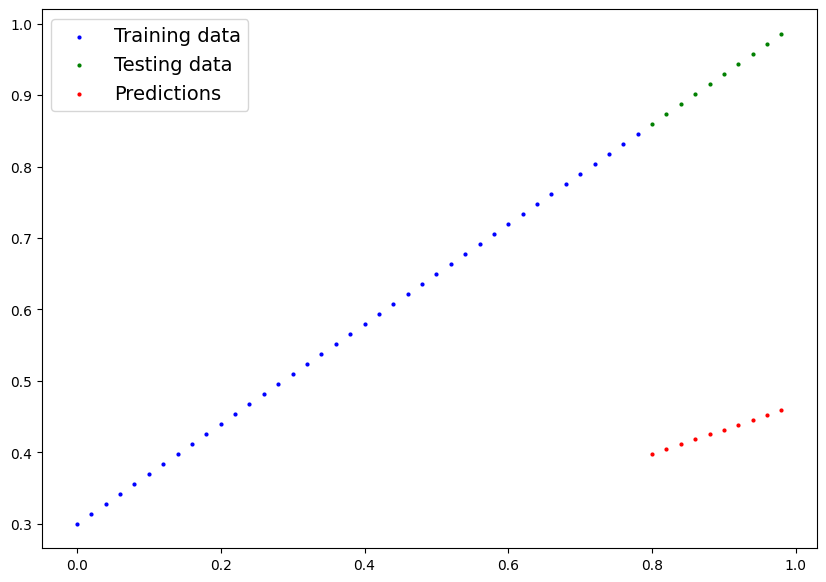

In [27]:
plot_predictions(predictions=y_preds);

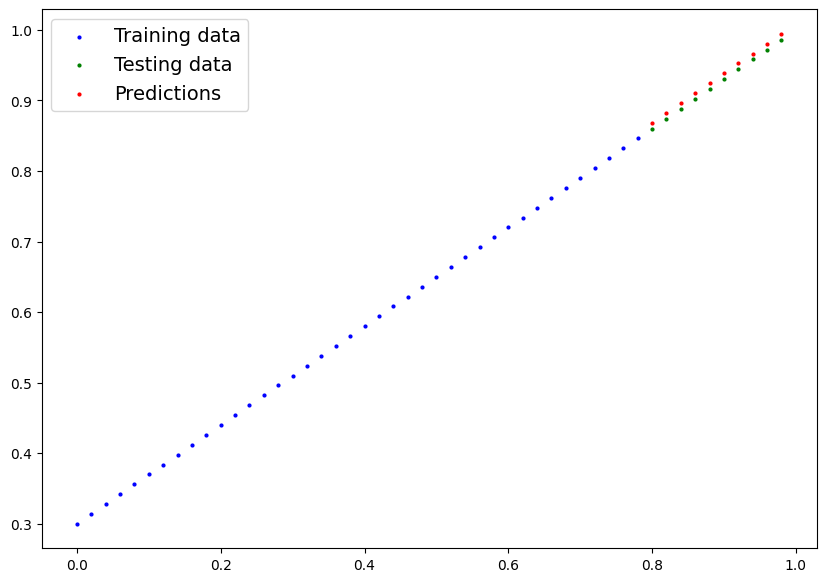

In [28]:
plot_predictions(predictions = y_preds_new)

### Saving a model in PyTorch

There are Three methods you should about for saving and loading models in PyTroch

1. `torch.save()` - allows you a PyTroch object in Python's pickle format
2. `torch.load()` - allows you load a save PyTorch object
3. `Torch.Module.load_state_dict()` - this allows to load a model`saved state dictionary

In [29]:
# Saving our PyTorch model
from pathlib import Path

# 1. Create models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

#2. Create a model save path
MODEL_NAME = "01_pytorch_workflow_model_0.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_0.state_dict(),
           f=MODEL_SAVE_PATH)



Saving model to: models/01_pytorch_workflow_model_0.pth


In [30]:
!ls -l models

total 8
-rw-r--r-- 1 root root 1207 Aug 13 06:39 01_pytorch_workflow_model_0.pth
-rw-r--r-- 1 root root 1271 Aug 13 06:26 01_pytorch_workflow_model_1.pth


### Loading a PyTorch model
Since we saved our model's `state_dict()` rather the entire model, we'll create intenace of our model class and `state_dict()` into that

In [31]:
model_loaded = torch.load("/content/models/01_pytorch_workflow_model_0.pth")

In [32]:
# To load in a saved state_dict we have to instantiate a new instance of our model class
loaded_model_0 = LinearRegressionModel()

#Load the saved state_dict of model_0 (this will update the new instance with updated parameters)
loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

<All keys matched successfully>

In [33]:
loaded_model_0.state_dict()

OrderedDict([('weight', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [34]:
# Make some predictions with our loaded model
loaded_model_0.eval()
with torch.inference_mode():
  loaded_model_preds = loaded_model_0(X_test)

loaded_model_preds

tensor([[0.8685],
        [0.8825],
        [0.8965],
        [0.9105],
        [0.9245],
        [0.9384],
        [0.9524],
        [0.9664],
        [0.9804],
        [0.9944]])

In [35]:
# Compare loaded model preds with original model preds
y_preds = loaded_model_preds
y_preds

tensor([[0.8685],
        [0.8825],
        [0.8965],
        [0.9105],
        [0.9245],
        [0.9384],
        [0.9524],
        [0.9664],
        [0.9804],
        [0.9944]])

## 6. Putting it all together

let's back through the steps above and see it all in one place

In [36]:
#import Pytorch and mathplotlib
import torch
from torch import nn
import matplotlib.pyplot as plt

# check PyTroch version
torch.__version__

'2.0.1+cu118'

Create device-agnostic code.
This means if we've got access to a GPU, our code will use it (for potentially faster computing).
if no GPU is available, the ode will default to using CPU

In [37]:
# Setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

Using device: cuda


### 6.1 data

In [38]:
# create some data using the linear regression formula of y = weight * X + bias
weight = 0.7
bias = 0.3

start = 0
end = 1
step = 0.02

# Create X and y (features and labels)
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias
X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [39]:
# Split data
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]
len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

In [40]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10, 7))

  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")

  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

  if predictions is not None:
    # Plot the predictions in red (predictions were made on the test data)
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  # Show the legend
  plt.legend(prop={"size": 14});

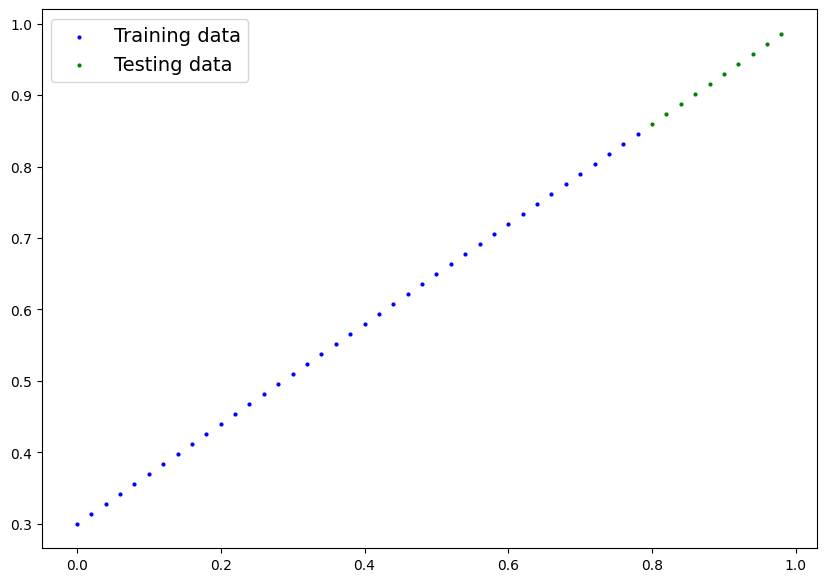

In [41]:
# plot the data
# note: if you don't have the plot_predictions() function loaded, this will error
plot_predictions(X_train, y_train, X_test, y_test)

### 6.2 building a PyTorch Linear model


In [42]:
from torch import nn
import torch
class LinearRegressionModelV2(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear_layer = nn.Linear(in_features=1,
                                  out_features=1)

  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.linear_layer(x)

# Set The manual seed
torch.manual_seed(42)
model_1 = LinearRegressionModelV2()
model_1, model_1.state_dict()

(LinearRegressionModelV2(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

In [43]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
             ('linear_layer.bias', tensor([0.8300]))])

In [44]:
X_train[:5], y_train[:5]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560]]))

In [45]:
# set the model to use the target device
device

'cuda'

In [46]:
# check the model current device
next(model_1.parameters()).device

device(type='cpu')

In [47]:
# Set the model to use the target device
model_1.to(device)
next(model_1.parameters()).device

device(type='cuda', index=0)

In [48]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.7645]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.8300], device='cuda:0'))])

### 6.3 Training

For training we need:
* Loss function
* Optimizer
* Training loop
* Testing loop

In [49]:
# Setup loss function
loss_fn = nn.L1Loss() # same as MAE

#Setup our optimizer
optimizer = torch.optim.SGD(params=model_1.parameters(),
                            lr=0.01)

In [50]:
# Let's write a training loop
torch.manual_seed(42)

epochs = 200

# Put data on the target devioce (device agnostic code for data)
X_train = X_train.to(device)
X_test = X_test.to(device)
y_train = y_train.to(device)
y_test = y_test.to(device)

for epoch in range(epochs):
  model_1.train()

  # 1. forward pass
  y_pred = model_1(X_train)

  # 2. Calculate the loss
  loss =  loss_fn(y_pred, y_train)

  # 3. Optimizer zero grad
  optimizer.zero_grad()

  # 4. perform backpropagation
  loss.backward()

  # 5. Optimizer step
  optimizer.step()

  ### Testing
  model_1.eval()
  with torch.inference_mode():
    test_pred = model_1(X_test)

    test_loss = loss_fn(test_pred, y_test)

  # Print out what's happening

  if epoch % 10 == 0:
    print(f"Epoch: {epoch} | loss: {loss} | Test loss: {test_loss}")

Epoch: 0 | loss: 0.5551779866218567 | Test loss: 0.5739762187004089
Epoch: 10 | loss: 0.439968079328537 | Test loss: 0.4392664134502411
Epoch: 20 | loss: 0.3247582018375397 | Test loss: 0.30455657839775085
Epoch: 30 | loss: 0.20954833924770355 | Test loss: 0.16984669864177704
Epoch: 40 | loss: 0.09433845430612564 | Test loss: 0.03513690456748009
Epoch: 50 | loss: 0.023886388167738914 | Test loss: 0.04784907028079033
Epoch: 60 | loss: 0.019956795498728752 | Test loss: 0.045803118497133255
Epoch: 70 | loss: 0.016517987474799156 | Test loss: 0.037530567497015
Epoch: 80 | loss: 0.013089174404740334 | Test loss: 0.02994490973651409
Epoch: 90 | loss: 0.009653178043663502 | Test loss: 0.02167237363755703
Epoch: 100 | loss: 0.006215683650225401 | Test loss: 0.014086711220443249
Epoch: 110 | loss: 0.00278724217787385 | Test loss: 0.005814164876937866
Epoch: 120 | loss: 0.0012645035749301314 | Test loss: 0.013801801018416882
Epoch: 130 | loss: 0.0012645035749301314 | Test loss: 0.013801801018416

In [51]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6968]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.3025], device='cuda:0'))])

In [52]:
weight, bias

(0.7, 0.3)

In [53]:
X_test, y_test

(tensor([[0.8000],
         [0.8200],
         [0.8400],
         [0.8600],
         [0.8800],
         [0.9000],
         [0.9200],
         [0.9400],
         [0.9600],
         [0.9800]], device='cuda:0'),
 tensor([[0.8600],
         [0.8740],
         [0.8880],
         [0.9020],
         [0.9160],
         [0.9300],
         [0.9440],
         [0.9580],
         [0.9720],
         [0.9860]], device='cuda:0'))

In [54]:
## make predictions with model

with torch.inference_mode():
  y_preds = model_1(X_test)

y_preds_numpy = y_preds.detach().cpu().numpy()

type(y_preds_numpy)

numpy.ndarray

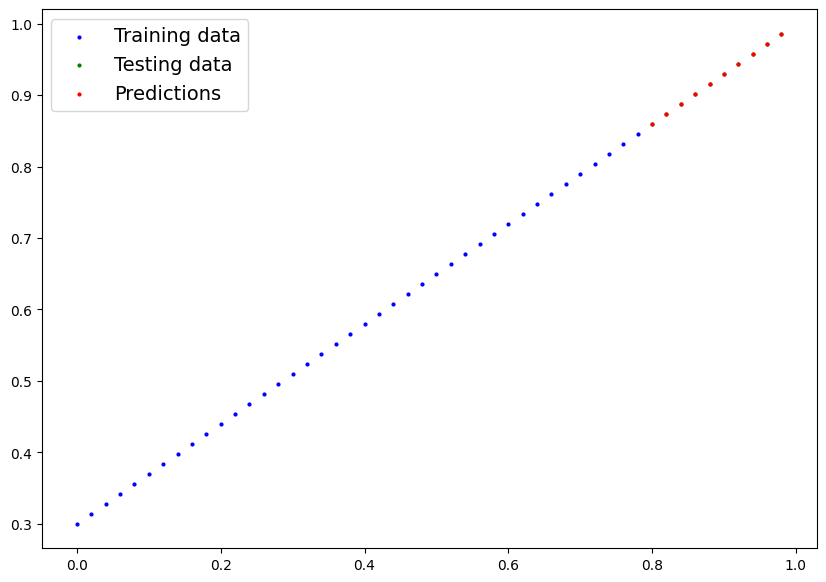

In [55]:
plot_predictions(predictions=y_preds_numpy)

### 6.5 Saving & loading a trained model

In [56]:
### 6.5 Saving & loading a trained model

In [57]:
# Saving our PyTorch model
from pathlib import Path

# 1. Create models directory
MODEL_1_PATH = Path("models")
MODEL_1_PATH.mkdir(parents=True, exist_ok=True)

#2. Create a model save path
MODEL_1_NAME = "01_pytorch_workflow_model_1.pth"
MODEL_1_SAVE_PATH = MODEL_1_PATH / MODEL_1_NAME

print(f"Saving model to: {MODEL_1_SAVE_PATH}")
torch.save(obj=model_1.state_dict(),
           f=MODEL_1_SAVE_PATH)



Saving model to: models/01_pytorch_workflow_model_1.pth


In [58]:
!ls -l models

total 8
-rw-r--r-- 1 root root 1207 Aug 13 06:39 01_pytorch_workflow_model_0.pth
-rw-r--r-- 1 root root 1271 Aug 13 06:39 01_pytorch_workflow_model_1.pth


In [59]:
model_1_loaded = torch.load("/content/models/01_pytorch_workflow_model_1.pth")

In [60]:
# To load in a saved state_dict we have to instantiate a new instance of our model class
loaded_model_1 = LinearRegressionModelV2()

#Load the saved state_dict of model_0 (this will update the new instance with updated parameters)
loaded_model_1.load_state_dict(torch.load(f=MODEL_1_SAVE_PATH))

loaded_model_1.to(device)

LinearRegressionModelV2(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)

In [61]:
next(loaded_model_1.parameters()).device

device(type='cuda', index=0)

In [62]:
loaded_model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6968]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.3025], device='cuda:0'))])

In [63]:
# Make some predictions with our GPU loaded model
loaded_model_1.eval()
with torch.inference_mode():
  loaded_model_1_preds = loaded_model_1(X_test)

y_preds == loaded_model_1_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]], device='cuda:0')